# Project: Sharktale, SharkTrack
## Data Cleaning

In [1174]:
!pip install xlrd #!pip install country_converter, keep this here pls

### Import of Libraries

In [1175]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

### Loading the Excel Data

In [1176]:
#define path to xls
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df = pd.read_excel(url)
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,NaN,Thompson Cove Beach,Swimming,Unknown,F,55,...,Unknown,Todd Smith: Platform X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17,...,Bull shark,9 News: The Brisbane Times: The Guardian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6990,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6991,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6992,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


### Data at a Glance 
Reviewing how the database is organised by using .head(), .info(), .describe(), .tail(), .columns. This will help me on how to pepare the data cleaning process.

In [1177]:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,NaN,Thompson Cove Beach,Swimming,Unknown,F,55,...,Unknown,Todd Smith: Platform X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17,...,Bull shark,9 News: The Brisbane Times: The Guardian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1178]:
df.tail()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
6989,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6990,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6991,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6992,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6993,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [1179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6994 non-null   object 
 1   Year            6992 non-null   float64
 2   Type            6976 non-null   object 
 3   Country         6944 non-null   object 
 4   State           6511 non-null   object 
 5   Location        6429 non-null   object 
 6   Activity        6409 non-null   object 
 7   Name            6775 non-null   object 
 8   Sex             6415 non-null   object 
 9   Age             4000 non-null   object 
 10  Injury          6959 non-null   object 
 11  Fatal Y/N       6433 non-null   object 
 12  Time            3468 non-null   object 
 13  Species         3862 non-null   object 
 14  Source          6975 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [1180]:
df.describe()

,Year,original order
count,6992.000000,6799.000000
mean,1935.044336,3401.152081
std,272.048128,1963.076319
min,0.000000,2.000000
25%,1947.000000,1701.500000
50%,1986.000000,3401.000000
75%,2009.000000,5100.500000
max,2026.000000,6802.000000


In [1181]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

### Columns Cleaning and Renaming 

I have reviewed the columns and decided to do the following: 
- Remove extra " " and also replacing extra " " with "_". 
- Dropping the following columns: "Case_Number_1", "Unnamed_21". "Unnamed_22" . 
- Renaming:  'Fatal Y/N': 'Fatal', 'Sex': 'Gender',  'pdf': 'PDF',  and  'Species ': 'Species', 'href': 'Link','original order': 'Original_Order', 

In [1182]:
df = df.rename(columns= {
    'Fatal Y/N': 'Fatal',
    'Species ': 'Species',
    'pdf': 'PDF', 
    'Sex': 'Gender',
    'href formula': 'Href_formula', 
    'href': 'Link',
    'Case Number': 'Case_Number', 
    'Case Number.1': 'Case_Number_1',
    'original order': 'Original_Order', 
    'Unnamed: 21': 'Unnamed_21', 
    'Unnamed: 22': 'Unnamed_22'
})
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Gender', 'Age', 'Injury', 'Fatal', 'Time', 'Species', 'Source',
       'PDF', 'Href_formula', 'Link', 'Case_Number', 'Case_Number_1',
       'Original_Order', 'Unnamed_21', 'Unnamed_22'],
      dtype='object')

In [1183]:
df["Case_Number"].isin(df["Case_Number_1"]).value_counts() # There is less than 10% difference 

Case_Number
True     6945
False      49
Name: count, dtype: int64

In [1184]:
# Dropping Columns
df = df.drop(columns=["Unnamed_21", "Unnamed_22", "PDF", "Href_formula", "Case_Number_1"])
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Gender', 'Age', 'Injury', 'Fatal', 'Time', 'Species', 'Source',
       'Link', 'Case_Number', 'Original_Order'],
      dtype='object')

In [1185]:
### Cleaning and replacing all Nan's of Columns that are objects/strings
df["Country"] = df["Country"].fillna("Unknown").str.strip().astype(str)
df["State"] = df["State"].fillna("Unknown").str.strip().astype(str)
df["Location"] = df["Location"].fillna("Unknown").str.strip().astype(str)
df["Activity"] = df["Activity"].fillna("Unknown").str.strip().astype(str)
df["Name"] = df["Name"].fillna("Unknown").str.strip().astype(str)
df["Gender"] = df["Gender"].fillna("Unknown").str.strip().astype(str)
df["Injury"] = df["Injury"].fillna("Unknown").str.strip().astype(str)
df["Species"] = df["Species"].fillna("Unknown").str.strip().astype(str)
df["Fatal"] = df["Fatal"].fillna("Unknown").str.strip().astype(str)
df["Link"] = df["Link"].fillna("Unknown").str.strip().astype(str)
df["Source"] = df["Source"].fillna("Unknown").str.strip().astype(str)
df["Type"] = df["Type"].fillna("Unknown").str.strip().astype(str)
df["Name"] = df["Name"].fillna("Unknown").str.strip().astype(str)
#df["Age"] = df["Age"].fillna("Unknown").str.strip().astype(str)

In [1186]:
print(df.isna().sum())  # Check-up for all Nan's

Date                 0
Year                 2
Type                 0
Country              0
State                0
Location             0
Activity             0
Name                 0
Gender               0
Age               2994
Injury               0
Fatal                0
Time              3526
Species              0
Source               0
Link                 0
Case_Number        196
Original_Order     195
dtype: int64


### Cleaning Column 'Month'

In [1187]:
def finding_month(date): 
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Oct", "Nov", "Dec"]
    #If it founds the info of a given month, it returns an output of this cleaning function
    try:
        for month in months: 
            if re.search(month, date):
                return month
    except TypeError:
        pass 
  
df["Month"] = df["Date"]
df["Month"] = df["Date"].apply(finding_month)
df["Month"].fillna(value="Unknown", inplace=True)
print(df["Month"].value_counts())  # Check unique values

Month
Unknown    1186
Jul         774
Aug         667
Jan         566
Jun         545
Oct         500
Apr         493
Dec         490
Mar         458
May         450
Nov         449
Feb         416
Name: count, dtype: int64


### Cleaning Column 'Date'

- Reviewing the column 'Date'. I am stripping the time component, because we already have a column with time.

In [1188]:
df["Date"].unique()[:100]

array([datetime.datetime(2025, 2, 7, 0, 0),
       datetime.datetime(2025, 2, 3, 0, 0),
       datetime.datetime(2025, 1, 23, 0, 0),
       datetime.datetime(2025, 1, 22, 0, 0),
       datetime.datetime(2025, 1, 11, 0, 0),
       datetime.datetime(2025, 1, 2, 0, 0),
       datetime.datetime(2024, 12, 29, 0, 0),
       datetime.datetime(2024, 12, 28, 0, 0),
       datetime.datetime(2024, 12, 2, 0, 0),
       datetime.datetime(2024, 12, 1, 0, 0),
       datetime.datetime(2024, 11, 30, 0, 0),
       datetime.datetime(2024, 11, 19, 0, 0),
       datetime.datetime(2024, 11, 15, 0, 0),
       datetime.datetime(2024, 11, 1, 0, 0),
       datetime.datetime(2024, 10, 31, 0, 0),
       datetime.datetime(2024, 10, 25, 0, 0),
       datetime.datetime(2024, 10, 14, 0, 0),
       datetime.datetime(2024, 10, 11, 0, 0),
       datetime.datetime(2024, 9, 17, 0, 0),
       datetime.datetime(2024, 9, 16, 0, 0),
       datetime.datetime(2024, 8, 26, 0, 0),
       datetime.datetime(2024, 8, 6, 0, 0),
     

In [1189]:
print(df["Date"].dtype)

object


In [1190]:
# To ensure all values are strings before applying the function 
df["Date"] = df["Date"].astype(str).str.lower().str.strip() # Converting everything to lowercase, and removing extra spaces before and after text. 

In [1191]:
def extract_date(text):
    """
    Extracts valid date-like information from messy strings.
    Converts multiple formats into a standard date format (DD-MM-YYYY).
    """
    if not isinstance(text, str) or text.lower().strip() in ["none", "nan", "null", ""]:
        return None  # Handle missing values

    text = text.strip()  # Remove leading/trailing spaces

    # Define regex patterns to capture different date formats
    date_patterns = [
        r"\d{4}-\d{2}-\d{2}",             # "2023-05-20" (ISO format)
        r"\d{1,2}-[a-z]{3}-\d{4}",        # "18-may-2023"
        r"\d{1,2} [a-z]{3}-\d{4}",        # "09 may-2023"
        r"\d{1,2} [a-z]{3} \d{4}",        # "15 Mar 2024"
        r"\d{1,2}-[A-Za-z]{3}-\d{4}",     # "23-Jun-2023"
        r"\d{1,2} [A-Za-z]{3} \d{4}",     # "15 Mar 2024"
        r"\d{1,2} [A-Za-z]+ \d{4}",       # "15 March 2024"
        r"\d{1,2}(st|nd|rd|th)? of [A-Za-z]+, \d{4}"  # "24th of May, 2022"
    ]

    for pattern in date_patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            return match.group(0)  # Extract the matched date part

    return None  # Return None if no valid date is found

 # Clean the "Date" column before applying regex
df["Date"] = df["Date"].astype(str).str.strip()

# Apply extraction function
df["Cleaned_Date"] = df["Date"].apply(extract_date)

# Convert extracted dates into proper datetime format
df["Cleaned_Date"] = pd.to_datetime(df["Cleaned_Date"], errors="coerce")

# Convert to DD-MM-YYYY format (Final Step)
df["Cleaned_Date"] = df["Cleaned_Date"].dt.strftime('%d-%m-%Y')

In [1192]:
# Count missing values (NaN)
null_count = df["Cleaned_Date"].isna().sum()
print(f"Number of null values: {null_count}")

Number of null values: 6945


In [1193]:
# Show only rows where Cleaned_Date is NaN
missing_rows = df[df["Cleaned_Date"].isna()]
missing_rows

,Date,Year,Type,Country,State,Location,Activity,Name,Gender,Age,Injury,Fatal,Time,Species,Source,Link,Case_Number,Original_Order,Month,Cleaned_Date
48,15 mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",N,16h00,Tiger shark,"Yahoo News, 3/15/2024",Unknown,NaN,NaN,Mar,NaN
49,04 mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",Unknown,NaN,NaN,Mar,NaN
50,02 mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,Not stated,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",Unknown,NaN,NaN,Mar,NaN
51,25 feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",Swimming,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",Unknown,NaN,NaN,Feb,NaN
52,14 feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",Unknown,NaN,NaN,Feb,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,6.0,Unknown,NaN
6990,before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Unknown,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,5.0,Unknown,NaN
6991,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,4.0,Unknown,NaN
6992,1883-1889,0.0,Unprovoked,PANAMA,Unknown,"Panama Bay 8ºN, 79ºW",Unknown,Jules Patterson,M,NaN,FATAL,Y,NaN,Unknown,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,3.0,Unknown,NaN


In [1194]:
display(df)

,Date,Year,Type,Country,State,Location,Activity,Name,Gender,Age,Injury,Fatal,Time,Species,Source,Link,Case_Number,Original_Order,Month,Cleaned_Date
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,Unknown,Thompson Cove Beach,Swimming,Unknown,F,55,Unknown,N,Unknown,Unknown,Todd Smith: Platform X,Unknown,NaN,NaN,Unknown,07-02-2025
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17,Bites to arm and upper body,Y,1645 hrs,Bull shark,9 News: The Brisbane Times: The Guardian,Unknown,NaN,NaN,Unknown,03-02-2025
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF,Unknown,NaN,NaN,Unknown,23-01-2025
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF,Unknown,NaN,NaN,Unknown,22-01-2025
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com,Unknown,NaN,NaN,Unknown,11-01-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989,before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,6.0,Unknown,NaN
6990,before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Unknown,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,5.0,Unknown,NaN
6991,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,4.0,Unknown,NaN
6992,1883-1889,0.0,Unprovoked,PANAMA,Unknown,"Panama Bay 8ºN, 79ºW",Unknown,Jules Patterson,M,NaN,FATAL,Y,NaN,Unknown,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,3.0,Unknown,NaN


<Axes: xlabel='Year'>

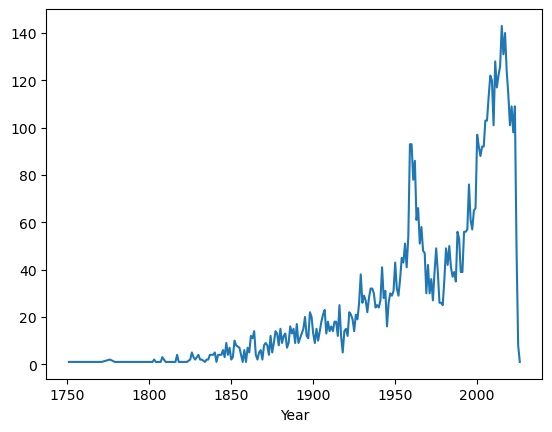

In [1195]:
df_count = df.groupby("Year")["Date"].count()
df_count[df_count.index > 1750].plot()

In [1196]:
#Converting Datetime to Date format 

### Data Cleaning for the Column 'Type' 

In [1197]:
df.Type.unique() 

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Sea Disaster', 'Unknown', '?', 'Unconfirmed', 'Unverified',
       'Invalid', 'Under investigation', 'Boat'], dtype=object)

In [1198]:
print(df["Type"].value_counts()) 

Type
Unprovoked             5155
Provoked                639
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  18
Boat                      7
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64


In [1199]:
print(df["Type"].value_counts(dropna=False)) # I wanted to review the Nan 

Type
Unprovoked             5155
Provoked                639
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Unknown                  18
Boat                      7
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64


In [1200]:
#Reviewing how many were provoked and unprovoked 
print(df["Type"].unique())

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Sea Disaster'
 'Unknown' '?' 'Unconfirmed' 'Unverified' 'Invalid' 'Under investigation'
 'Boat']


In [1201]:
df["Type"] = df["Type"].str.strip()
df["Type"] = df["Type"].replace({
    " Provoked": "Provoked", 
    "Unconfirmed": "Unknown",
    "?" : "Unknown",
    "Invalid": "Unknown",
    "Under investigation": "Unknown",
    "Questionable": "Unknown", 
    "Watercraft" : "Water Vehicle", 
    "Boat" : "Water Vehicle"
})

df["Type"] = df["Type"].fillna("Unknown")
print(df["Type"].unique())

['Unprovoked' 'Provoked' 'Unknown' 'Water Vehicle' 'Sea Disaster'
 'Unverified']


In [1202]:
#Filter for Unprovoked Shark Attacks 
filter_provoked_gen = ((df["Type"] == "Unprovoked") & (df["Year"] >= 1960) & (df["Year"]<2025))
df = df.loc[filter_provoked_gen]

### Data Cleaning for the Column 'Gender'

In [1203]:
df["Gender"] = df["Gender"].replace({
    " M": "M", 
    "M ": "M", 
    "M x 2": "M", 
    " nan": "Unknown", 
    "lli": "Unknown", 
    "N": "M", 
    ".": "Unknown"
    })
df["Gender"] = df["Gender"].fillna("Unknown")
df.Gender.unique()

array(['M', 'F', 'Unknown'], dtype=object)

### Data Cleaning for the Column 'Species'

In [1204]:
df["Species"].unique()
print(df["Species"].unique()[:600])

['Reportedly a Tiger Shark' 'Unknown' 'Not stated'
 '1m shark species unknown' 'Great White Shark'
 'Reported as a large Tiger shark' 'Bull or tiger 7-8ft' 'Bull shark'
 'Bull shark 6ft' 'Bull shark 6-7ft' 'Reportedly a Great White'
 'Reportedly Tiger Shark' 'Reef shark 6ft (1.8m)' '3m White Shark'
 'Undetermined small shall shark' '4-5ft Blacktip shark' 'Not specified'
 'Bull shark 6 ft' '6ft shark'
 'Not stated area has Tiger and Galapogas sharks'
 'Not specified Bull shark highly suspect' 'Large shark' '2.5m shark'
 '3m Sandbar shark' 'Bull shark 3m' 'Carribean reef shark 7ft'
 'Great White' 'Tiger shark' "Tiger shark 8'" "3' to 4' shark"
 "Bull shark, 7'" 'White shark' "White shark, 13'" 'Broze whaler?'
 'Sevengill shark' '1.8m bull shark' 'Lemon shark' 'White Shark, 4.5 m'
 "8' tiger shark" "Nurse shark, 5' to 6'" "10' tiger shark"
 "10' to 12' Galapagos shark" 'Tiger shark?' 'White shark, 3.8-4.2m'
 'Blue shark' 'Wfite shark' 'Wobbegong shark' "8' shark"
 'Oceanic whitetip shark'

In [1205]:
# Cleaning the Column 'Species' a bit 
df["Species"] = df["Species"].str.extract(r'([A-Za-z\s-]+)').fillna("Unknown") # Cleaning here the unnecessary details
df["Species"] = df["Species"].replace({
    "Not stated":"Unknown"
})
print(df["Species"])

7       Reportedly a Tiger Shark
8       Reportedly a Tiger Shark
9                        Unknown
10                       Unknown
11       m shark species unknown
                  ...           
4706                     Unknown
4707                     Unknown
4708                     Unknown
4709                     Unknown
4710                          m 
Name: Species, Length: 3578, dtype: object


In [1206]:
df["Species_Types"] = df["Species"].copy() # creating a copy of species and naming it Species_Types

In [1207]:
df["Species_Types"] = df["Species_Types"].astype(str).str.strip()

In [1208]:
df["Species_Types"] = df["Species_Types"].fillna("Unknown").astype(str)

In [1209]:
df["Species_Types"] = df["Species_Types"].replace({
    "Not stated": "Unknown",
    "Not specified": "Unknown",
    "Invalid": "Unknown",
    "Great White Shark": "White Shark"   
}) 

In [1210]:
# Graphing Attacks by Species 



In [1211]:
def clean_shark_name(species): 
    species = species.strip().lower()

    match = re.search(r"(?:\b\w+\s+)*?(great white|spinner|leopard|whitetip|sandtiger|lemon|horn|white|tiger|broadnos|bull|Bull|hammerhead|hammer|grey|Grey|Hammerhead|blacktip|Blacktip|whale|nurse|mako|reef|Reef)(?:\s+\w+)*?\s*shark(?:\s+\w+)*?", species)

    if match:
        #return match.group(0).title()
        return match.group(1).title() + " Shark"
    else: 
        return "Other/Unknown"

df["Species_Types"] = df["Species_Types"].apply(clean_shark_name)

print(df["Species_Types"].value_counts())  # Check unique values
print(df["Species_Types"].tail())  # Display first few rows

Species_Types
Other/Unknown       2580
White Shark          348
Tiger Shark          204
Bull Shark           160
Blacktip Shark        86
Reef Shark            29
Grey Shark            28
Whitetip Shark        27
Lemon Shark           23
Nurse Shark           23
Spinner Shark         20
Mako Shark            19
Hammerhead Shark      17
Sandtiger Shark       13
Whale Shark            1
Name: count, dtype: int64
4706    Other/Unknown
4707    Other/Unknown
4708    Other/Unknown
4709    Other/Unknown
4710    Other/Unknown
Name: Species_Types, dtype: object


In [1212]:
df["Species_Types"].unique()

array(['Tiger Shark', 'Other/Unknown', 'White Shark', 'Bull Shark',
       'Reef Shark', 'Lemon Shark', 'Nurse Shark', 'Whitetip Shark',
       'Grey Shark', 'Blacktip Shark', 'Spinner Shark', 'Sandtiger Shark',
       'Mako Shark', 'Hammerhead Shark', 'Whale Shark'], dtype=object)

In [1213]:
#df["Location"] = df["Location"].astype(str).str.strip()
print(df["Species_Types"].value_counts())

Species_Types
Other/Unknown       2580
White Shark          348
Tiger Shark          204
Bull Shark           160
Blacktip Shark        86
Reef Shark            29
Grey Shark            28
Whitetip Shark        27
Lemon Shark           23
Nurse Shark           23
Spinner Shark         20
Mako Shark            19
Hammerhead Shark      17
Sandtiger Shark       13
Whale Shark            1
Name: count, dtype: int64


### Data Cleaning for the Column 'Fatal'

In [1214]:
df["Fatal"].unique()

array(['N', 'Y', 'F', 'M', 'Unknown', 'Nq', 'UNKNOWN'], dtype=object)

In [1215]:
df["Fatal"] = df["Fatal"].fillna("Unknown").str.strip().astype(str)

In [1216]:
# Data Cleaning for The Column Fatal
df["Fatal"] = df["Fatal"].fillna("Unknown")
df["Fatal"] = df["Fatal"].str.strip()
df["Fatal"].value_counts(dropna=False)
df["Fatal"] = df["Fatal"].astype(str)
df["Fatal"] = df["Fatal"].replace({
    "Nan": "Unknown",
    " N": "NO",
    "UNKNOWN": "Unknown",
    "F": "Unknown",\
    "M": "NO",
    "n": "NO",
    "N": "NO",
    "Nq": "NO",
    "Y": "YES",
    2017: "Unknown",
    "2017 ": "Unknown",
     "Y x 2": "Yes",
     "y": "Yes",
     "N   ": "NO",
     "nan": "Unknown"
})
df["Fatal"].unique()

array(['NO', 'YES', 'Unknown'], dtype=object)

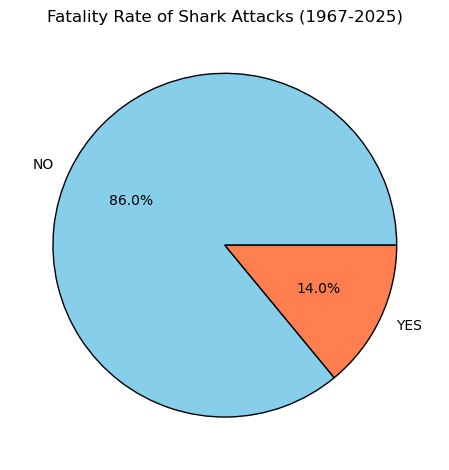

In [1217]:
# Define colors and labels dynamically to match data
slices = df["Fatal"].value_counts().nlargest(2)
labels = slices.index.tolist()  # Get correct labels
colors = ["skyblue", "coral"][:len(labels)]  # Ensure colors match number of slices
explode = [0] * len(labels)  # No explode by default

# Create pie chart
plt.pie(slices, labels=labels, colors=colors, explode=explode, 
        autopct="%1.1f%%", wedgeprops={"edgecolor": "black"})

plt.title("Fatality Rate of Shark Attacks (1967-2025)")
plt.tight_layout()
plt.savefig("AttacksFatalityRate.png")

# Show the chart
plt.show()


In [1218]:
#print(df["Species_Types"].value_counts())

### Data Cleaning for the Column 'Country'

In [1219]:
df["Country"].unique()

array(['Egypt', 'Australia', 'Thailand', 'New Zealand', 'Maldives',
       'Hawaii', 'USA', 'Honduras', 'Morocco', 'Jamaica', 'Belize',
       'Maldive Islands', 'Turks and Caicos', 'French Polynesia',
       'Tobago', 'Bahamas', 'AUSTRALIA', 'INDIA', 'BAHAMAS', 'MEXICO',
       'NEW ZEALAND', 'BELIZE', 'EGYPT', 'PHILIPPINES', 'SPAIN', 'SAMOA',
       'COLOMBIA', 'ECUADOR', 'FRENCH POLYNESIA', 'NEW CALEDONIA',
       'TURKS and CaICOS', 'SOUTH AFRICA', 'BRAZIL', 'SEYCHELLES',
       'MeXICO', 'ENGLAND', 'JAPAN', 'INDONESIA', 'JAMAICA', 'MALDIVES',
       'THAILAND', 'COLUMBIA', 'British Overseas Territory', 'CANADA',
       'JORDAN', 'ST KITTS / NEVIS', 'ST MARTIN', 'FIJI',
       'PAPUA NEW GUINEA', 'CUBA', 'ISRAEL', 'REUNION ISLAND', 'ITALY',
       'COSTA RICA', 'Unknown', 'MAURITIUS', 'SOLOMON ISLANDS',
       'ST HELENA, British overseas territory', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'CHINA', 'Fiji',
       'DOMINICAN REPUBLIC', 'ARUBA', 'MOZAMBIQUE', 'PUE

In [1220]:
len(df["Country"].unique())

133

In [1221]:
update_country = {
    'AUSTRALIA': 'Australia',
    'BAHAMAS': 'Bahamas',
    'BELIZE': 'Belize',
    'COLOMBIA': 'Colombia',
    'COLUMBIA': 'Colombia',
    'EGYPT': 'Egypt',
    'ENGLAND': 'United Kingdom',
    'FRENCH POLYNESIA': 'French Polynesia',
    'INDIA': 'India',
    'INDONESIA': 'Indonesia',
    'JAMAICA': 'Jamaica',
    'JAPAN': 'Japan',
    'MALDIVE ISLANDS': 'Maldives',
    'MALDIVES': 'Maldives',
    'MEXICO': 'Mexico',
    'MeXICO': 'Mexico',
    'MEXICO ': 'Mexico',
    'NEW CALEDONIA': 'New Caledonia',
    'NEW ZEALAND': 'New Zealand',
    'PHILIPPINES': 'Philippines',
    'SPAIN': 'Spain',
    'SOUTH AFRICA': 'South Africa',
    'South Africa': 'South Africa',
    'THAILAND': 'Thailand',
    'TRINIDAD': 'Trinidad and Tobago',
    'TRINIDAD & TOBAGO': 'Trinidad and Tobago',
    'TURKS & CAICOS': 'Turks and Caicos',
    'TURKS and CaICOS': 'Turks and Caicos',
    'UNITED ARAB EMIRATES (UAE)': 'United Arab Emirates',
    'UNITED KINGDOM': 'United Kingdom',
    'USA': 'United States',
    'UAE': 'United Arab Emirates',
    'UNITED STATES': 'United States',
    'REUNION ISLAND': 'Reunion',
    'REUNION': 'Reunion',
    'ST MARTIN': 'Saint Martin',
    'ST. MARTIN': 'Saint Martin',
    'ST. MAARTIN': 'Saint Martin',
    'SAINT MAARTEN': 'Saint Martin',
    'PAPUA NEW GUINEA': 'Papua New Guinea',
    'FIJI': 'Fiji',
    'Fiji': 'Fiji',
    'CANADA': 'Canada',
    'CUBA': 'Cuba',
    'ARGENTINA': 'Argentina',
    'BRAZIL': 'Brazil',
    'CHILE': 'Chile',
    'ECUADOR': 'Ecuador',
    'PERU': 'Peru',
    'VENEZUELA': 'Venezuela',
    'COOK ISLANDS': 'Cook Islands',
    'DOMINICAN REPUBLIC': 'Dominican Republic',
    'SEYCHELLES': 'Seychelles',
    'ST KITTS / NEVIS': 'Saint Kitts and Nevis',
    'ST HELENA, British overseas territory': 'Saint Helena',
    'SOLOMON ISLANDS': 'Solomon Islands',
    'TONGA': 'Tonga',
    ' TONGA': 'Tonga',
    'KIRIBATI': 'Kiribati',
    'PALAU': 'Palau',
    'MALTA': 'Malta',
    'SCOTLAND': 'United Kingdom',
    'IRELAND': 'Ireland',
    'ITALY': 'Italy',
    'MALAYSIA': 'Malaysia',
    'LIBYA': 'Libya',
    'JORDAN': 'Jordan',
    'ISRAEL': 'Israel',
    'CHINA': 'China',
    'TAIWAN': 'Taiwan',
    'INDIAN OCEAN': 'Indian Ocean',
    'INDIAN OCEAN?': 'Indian Ocean',
    'INDIAN OCEAN?': 'Indian Ocean',
    'NORTH ATLANTIC OCEAN': 'North Atlantic Ocean',
    'NORTH ATLANTIC OCEAN ': 'North Atlantic Ocean',
    'SOUTH ATLANTIC OCEAN': 'South Atlantic Ocean',
    'ATLANTIC OCEAN': 'Atlantic Ocean',
    'PACIFIC OCEAN': 'Pacific Ocean',
    'PACIFIC OCEAN ': 'Pacific Ocean',
    'SOUTH PACIFIC OCEAN': 'South Pacific Ocean',
    'NORTH PACIFIC OCEAN': 'North Pacific Ocean',
    'CARIBBEAN SEA': 'Caribbean Sea',
    'MID ATLANTIC OCEAN': 'Mid Atlantic Ocean',
    'SOUTH CHINA SEA': 'South China Sea',
    'BAY OF BENGAL': 'Bay of Bengal',
    'RED SEA': 'Red Sea',
    'RED SEA?': 'Red Sea',
    'RED SEA / INDIAN OCEAN': 'Red Sea',
    'GULF OF ADEN': 'Gulf of Aden',
    'PERSIAN GULF': 'Persian Gulf',
    'CEYLON': 'Sri Lanka',
    'CEYLON (SRI LANKA)': 'Sri Lanka',
    'SRI LANKA': 'Sri Lanka',
    'BANGLADESH': 'Bangladesh',
    'BURMA': 'Myanmar',
    'MYANMAR': 'Myanmar',
    'VIETNAM': 'Vietnam',
    'HONG KONG': 'Hong Kong',
    'MARTINIQUE': 'Martinique',
    'NETHERLANDS ANTILLES': 'Netherlands Antilles',
    'NORTHERN MARIANA ISLANDS': 'Northern Mariana Islands',
    'FEDERATED STATES OF MICRONESIA': 'Micronesia',
    'MICRONESIA': 'Micronesia',
    'FALKLAND ISLANDS': 'Falkland Islands',
    'GIBRALTAR': 'Gibraltar',
    'SAUDI ARABIA': 'Saudi Arabia',
    'SINGAPORE': 'Singapore',
    'SENEGAL': 'Senegal',
    'SOMALIA': 'Somalia',
    'SOUTH KOREA': 'South Korea',
    'NORTH KOREA': 'North Korea',
    'RUSSIA': 'Russia',
    'GREECE': 'Greece',
    'TUNISIA': 'Tunisia',
    'TURKEY': 'Turkey',
    'IRAN': 'Iran',
    'IRAQ': 'Iraq',
    'KUWAIT': 'Kuwait',
    'LEBANON': 'Lebanon',
    'SYRIA': 'Syria',
    'AFRICA': 'Africa',
    'Coast of AFRICA': 'Africa',
    'GEORGIA': 'Georgia',
    'GHANA': 'Ghana',
    'GUINEA': 'Guinea',
    'NAMIBIA': 'Namibia',
    'TANZANIA': 'Tanzania',
    'ALGERIA': 'Algeria',
    'DJIBOUTI': 'Djibouti',
    'EQUATORIAL GUINEA / CAMEROON': 'Equatorial Guinea',
    'WEST INDIES': 'Caribbean',
    'BRITISH ISLES': 'United Kingdom',
    'BRITISH WEST INDIES': 'Caribbean',
    'ST HELENA, British overseas territory': 'Saint Helena',
    'NORWAY': 'Norway',
    'ICELAND': 'Iceland',
    'GABON': 'Gabon',
    'MAYOTTE': 'Mayotte',
    'SWEDEN': 'Sweden',
    'SLOVENIA': 'Slovenia',
    'CURACAO': 'Curaçao',
    'HAITI': 'Haiti',
    'GUATEMALA': 'Guatemala',
    'NICARAGUA': 'Nicaragua',
    'NICARAGUA ': 'Nicaragua',
    'HONDURAS': 'Honduras',
    'EL SALVADOR': 'El Salvador',
    'COSTA RICA': 'Costa Rica',
    'PANAMA': 'Panama',
    'BARBADOS': 'Barbados',
    'ARUBA': 'Aruba',
    'GRAND CAYMAN': 'Cayman Islands',
    'CAYMAN ISLANDS': 'Cayman Islands',
    'SAINT LUCIA': 'Saint Lucia',
    'USA': 'United States', 
    'Usa': 'United States'
}

In [1222]:
df['Country'] = df['Country'].replace(update_country).fillna('Unknown')

In [1223]:
df['Country'].unique()

array(['Egypt', 'Australia', 'Thailand', 'New Zealand', 'Maldives',
       'Hawaii', 'United States', 'Honduras', 'Morocco', 'Jamaica',
       'Belize', 'Maldive Islands', 'Turks and Caicos',
       'French Polynesia', 'Tobago', 'Bahamas', 'India', 'Mexico',
       'Philippines', 'Spain', 'SAMOA', 'Colombia', 'Ecuador',
       'New Caledonia', 'South Africa', 'Brazil', 'Seychelles',
       'United Kingdom', 'Japan', 'Indonesia',
       'British Overseas Territory', 'Canada', 'Jordan',
       'Saint Kitts and Nevis', 'Saint Martin', 'Fiji',
       'Papua New Guinea', 'Cuba', 'Israel', 'Reunion', 'Italy',
       'Costa Rica', 'Unknown', 'MAURITIUS', 'Solomon Islands',
       'Saint Helena', 'UNITED ARAB EMIRATES', 'China',
       'Dominican Republic', 'Aruba', 'MOZAMBIQUE', 'PUERTO RICO',
       'FRANCE', 'Kiribati', 'DIEGO GARCIA', 'Taiwan', 'GUAM', 'NIGERIA',
       'Tonga', 'KENYA', 'Russia', 'Malaysia', 'South Korea', 'Malta',
       'Vietnam', 'MADAGASCAR', 'United Arab Emirates', '

In [1224]:
 #Data Cleaning for the column 'Country', I've tried to use regex 
df["Country"] = df["Country"].str.strip().str.title()
df["Country"] = df["Country"].str.replace(r"[^a-zA-Z\s]", "", regex=True)
#df["Country"] = df["Country"].map(lambda x: x.upper())
df["Country"] = df["Country"].fillna("Unknown")
print(df["Country"].unique())

['Egypt' 'Australia' 'Thailand' 'New Zealand' 'Maldives' 'Hawaii'
 'United States' 'Honduras' 'Morocco' 'Jamaica' 'Belize' 'Maldive Islands'
 'Turks And Caicos' 'French Polynesia' 'Tobago' 'Bahamas' 'India' 'Mexico'
 'Philippines' 'Spain' 'Samoa' 'Colombia' 'Ecuador' 'New Caledonia'
 'South Africa' 'Brazil' 'Seychelles' 'United Kingdom' 'Japan' 'Indonesia'
 'British Overseas Territory' 'Canada' 'Jordan' 'Saint Kitts And Nevis'
 'Saint Martin' 'Fiji' 'Papua New Guinea' 'Cuba' 'Israel' 'Reunion'
 'Italy' 'Costa Rica' 'Unknown' 'Mauritius' 'Solomon Islands'
 'Saint Helena' 'United Arab Emirates' 'China' 'Dominican Republic'
 'Aruba' 'Mozambique' 'Puerto Rico' 'France' 'Kiribati' 'Diego Garcia'
 'Taiwan' 'Guam' 'Nigeria' 'Tonga' 'Kenya' 'Russia' 'Malaysia'
 'South Korea' 'Malta' 'Vietnam' 'Madagascar' 'Panama' 'Croatia' 'Yemen'
 'Gulf Of Aden' 'Sierra Leone' 'Cayman Islands' 'Vanuatu' 'Venezuela'
 'Uruguay' 'Micronesia' 'Okinawa' 'Tanzania' 'Marshall Islands'
 'Egypt  Israel' 'Northern Ara

In [1225]:
unique_country = len(df['Country'].unique())
unique_country

112

In [1226]:
df["Country"] = df["Country"].replace(update_country) # Reassigning it back to "Country"

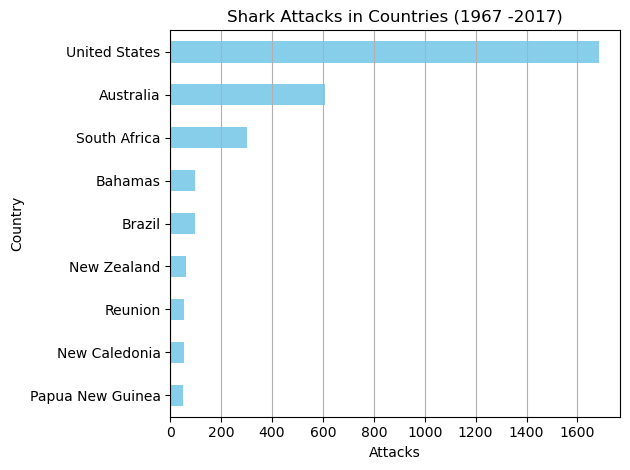

In [1227]:
# Top 10 Country
top_10_attacks_country = df["Country"].value_counts().nlargest(9)

# Graphic Attacks by State 
top_10_attacks_country.sort_values(ascending=True, inplace=True)
top_10_attacks_country.plot.barh(color="skyblue")

plt.title("Shark Attacks in Countries (1967 -2017)")
plt.xlabel("Attacks")
plt.grid(axis="x")
plt.tight_layout()
plt.savefig("AttacksByCountry.png") # Saving as an image 

### Data Cleaning for the Column 'States'

In [1228]:
# A filter specifically for USA 
filter_usa = (df["Country"] == "United States")
usa_df = df.loc[filter_usa]

# A filter specifically for Australia 
filter_aus = (df["Country"] == "Australia")
aus_df = df.loc[filter_aus]

# A filter for the rest of the world
rest_of_world_df = df[~df["Country"].isin(["United States", "Australia"])]


In [1229]:
# Top Shark Attacks by State
top_attacks_usa = df["State"].value_counts()
top_attacks_usa

State
Florida                      908
Hawaii                       226
New South Wales              200
California                   183
Western Australia            140
                            ... 
Bois-Blanc                     1
East New Britain               1
Santa Elena                    1
Trois-Bassins                  1
West New Britain Province      1
Name: count, Length: 434, dtype: int64

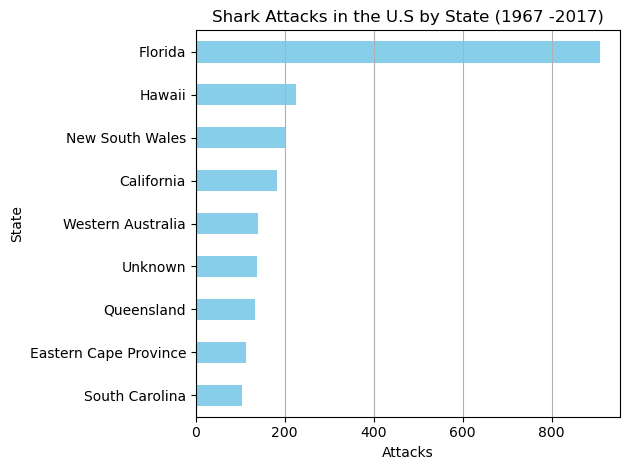

In [1230]:
# Top 10 Shark Attacks by State
top_10_attacks_usa = df["State"].value_counts().nlargest(9)

# Graphic Attacks by State 
top_10_attacks_usa.sort_values(ascending=True, inplace=True)
top_10_attacks_usa.plot.barh(color="skyblue")

plt.title("Shark Attacks in the U.S by State (1967 -2017)")
plt.xlabel("Attacks")
plt.grid(axis="x")
plt.tight_layout()
plt.savefig("AttacksByState.png") # Saving as an image 

### Data Cleaning for the Column 'Age'

In [1231]:
df["Age"].unique()

array([69, 48, 40, '60+', '?', 57, 24, 45, 61, 27, 38, 16, 33, 30, 15, 23,
       41, 14, 26, 'Middle age', 21, 49, 25, 46, 19, 20, 65, 64, '13',
       nan, '11', '46', '32', '29', '10', '64', '39', '22', '15', '16',
       '21', '20', '44', '26', '47', '66', '55', '30', '8', '50', '52',
       '45', '34', '30s', '37', '9', '35', '65', '20s', '77', '60', '49',
       '42', '!2', '24', '73', '25', '50s', '58', '67', '14', '6', '59',
       '53', '68', '43', '51', '19', '40', '38', '17', '31', 39, 58, 51,
       17, 10, 13, 60, 28, '40s', 68, 35, 62, 'teen', 8, 22, 32, 56,
       'Teen', 42, 36, 18, 'M', 9, 11, 34, '!6', 31, '!!', 12, 7, 71, 59,
       53, 54, 75, 73, 52, 29, 70, 50, 4, 63, 37, '28 & 22', '22, 57, 31',
       '60s', "20's", 43, 67, 'a minor', 55, 3, 82, 47, 66, 72, 6, 44,
       '23', '12', '18', '36', '63', '71', '48', '70', '18 months', '41',
       '7', '28', '61', '57', '74', '27', '56', '33', '28 & 26', '62',
       '5', '54', '86', '18 or 20', '12 or 13', 77, 84, 

In [1232]:
df["Age"] = df["Age"].str.strip()
print(df["Age"].value_counts())

Age
15           64
17           55
18           53
20           48
16           47
             ..
18 months     1
74            1
28 & 26       1
86            1
30 & 32       1
Name: count, Length: 112, dtype: int64


In [1233]:
df["Age"] = df["Age"].replace({"20s":"25", "30s":"35", "teen": "15", "Teen": "15", "mid-30s":"35", "21 or 26":"24", "60's":"65", "60s":"65", "12 or 13":"12", "50s":"55", "Middle age": "40", "9 & 12":"9", "Elderly": "12", "6½":"6"})

In [1234]:
print(df["Age"].unique()[:120])

[nan '60+' '?' '40' '13' '11' '46' '32' '29' '10' '64' '39' '22' '15' '16'
 '21' '20' '44' '26' '47' '66' '55' '30' '8' '50' '52' '45' '34' '35' '37'
 '9' '65' '25' '77' '60' '49' '42' '!2' '24' '73' '58' '67' '14' '6' '59'
 '53' '68' '43' '51' '19' '38' '17' '31' '40s' 'M' '!6' '!!' '28 & 22'
 '22, 57, 31' "20's" 'a minor' '23' '12' '18' '36' '63' '71' '48' '70'
 '18 months' '41' '7' '28' '61' '57' '74' '27' '56' '33' '28 & 26' '62'
 '5' '54' '86' '18 or 20' '30 or 36' '21 & ?' '33 or 37' '20?' '87' ''
 '>50' '18 to 22' '9 months' '25 to 35' '23 & 26' '(adult)' '25 or 28'
 '30 & 32']


Text(0.5, 1.0, 'Age Distribution')

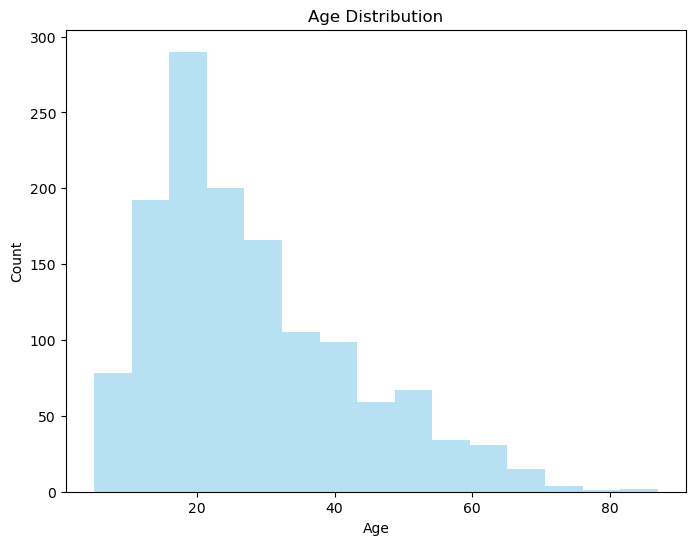

In [1235]:
def age_process(age):
    try:
        age = int(age)
    except:
        age = 0
    if (age > 0 and age <= 100):
        return age
    else:
        return np.nan
df['Age'].fillna(0,inplace=True)
df['Age'] = df['Age'].apply(age_process)
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df['Age'].dropna().astype(np.int32),
             ax=ax,
             hist_kws={"alpha": 0.6, "color": "skyblue"},
             kde=False,bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

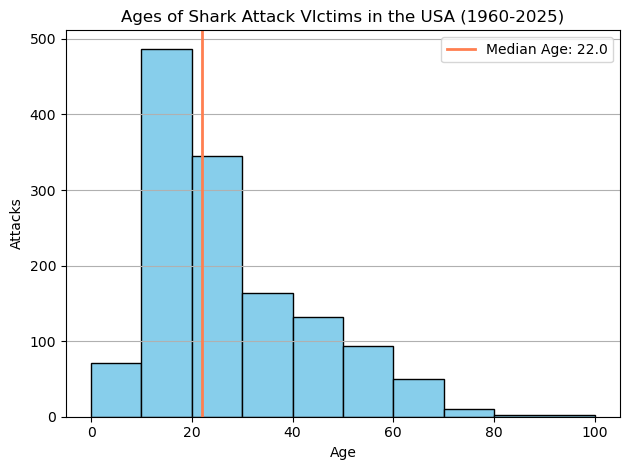

In [1236]:
#Graphic Attacks By Age

usa_df["Age"] = pd.to_numeric(usa_df["Age"], errors="coerce")

age_usa = usa_df["Age"].dropna()

# Making bins for age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
plt.hist(age_usa, bins=bins, edgecolor = "black", color="skyblue")

median = age_usa.median()
plt.axvline(median, color="coral", label= f"Median Age: {median:.1f}", linewidth=2)

# Labels and Title 
plt.title("Ages of Shark Attack VIctims in the USA (1960-2025)")
plt.ylabel("Attacks")
plt.xlabel("Age")

# Formatting
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("AttacksByAge.png")

### Data Cleaning for the Column 'Location'

In [1237]:
df["Location"] = df["Location"].astype(str).str.strip()
df["Location"] = df["Location"].map(lambda x:x.upper())
df["Location"] = df["Location"].fillna("Unknown")
#df["Location"] = df["Location"]
df["Location"] = df["Location"].replace({ "NAN": "Unknown", "nan": "Unknown","Nan": "Unknown"})

In [1238]:
df["Location"].unique()[:100]

array(['RED SEA', 'HUMPY ISLAND GREAT KEPPEL ISLAND',
       'CURTIS ISLAND NEAR GLADSTONE QLD CENTRAL COAST',
       'GREENOUGH RIVER MOUTH BEACH CAPE BURNEY 12KM SOUTH OF GERALDTON',
       'KHAO LAK BEACH', 'CHATHAM ISLANDS', 'MAAFUSHI',
       'SAND PILES WAIEHU BEACH PARK', 'WHITSUNDAY ISLANDS',
       'BATHTUB BEACH, MARTIN COUNTY', 'ATLANTIDA',
       'BREVARD COUNTY ORLANDO', 'PUERTO CASTILLO', 'WEST OF DAKHLA',
       'FALMOUTH', 'CENTRAL AMERICA', 'NORTH SHORE BEACH, PORT MACQUARIE',
       'TRIGG BEACH STERLING', 'PONCE DE LEON INLET VOLUSIA COUNTY',
       'NEW SMYRNA BEACH', 'SOUTH PADRE ISLAND',
       'NEW SMYRNA BEACH BEACH ACCESS 14 VOLUSIA COUNTY',
       "GOAT ISLAND (MOKU'AUIA) LA'IE BAY", 'HALEIWA, OAHU',
       'ROSEMARY BEACH WALTON COUNTY', 'WATER SOUND  BEACH WALTON COUNTY',
       'DEL MAR BEACH SAN DIEGO', 'INDIAN OCEAN', 'JAMAICA BEACH',
       'LEWARD REEF', 'MANGAREVA ATOLL',
       "Y-73' LEDGE REEF CHARESTON COAST", 'TURTLE BEACH',
       'FLYING FISH MA

In [1239]:
df["Location"] = df["Location"].str.strip().str.lower().str.capitalize()
df["Location"]

7                                                 Red sea
8                                                 Red sea
9                        Humpy island great keppel island
10         Curtis island near gladstone qld central coast
11      Greenough river mouth beach cape burney 12km s...
                              ...                        
4706                            Covull reef, near lautoka
4707                                              Unknown
4708                               West nakanai,  talasea
4709                                              Xai xai
4710                                      Kei river mouth
Name: Location, Length: 3578, dtype: object

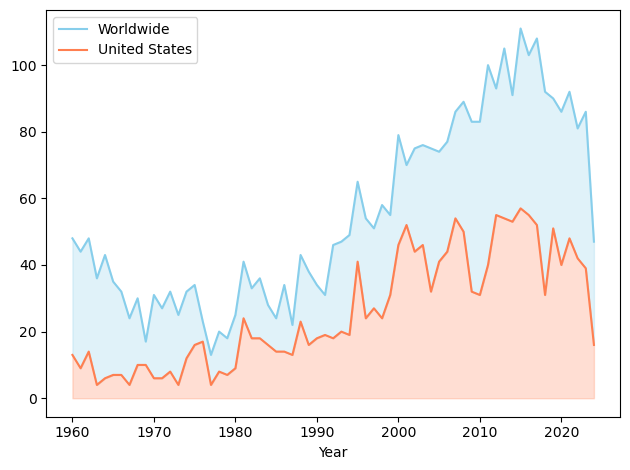

In [1240]:
#Graphic Attacks by Year 

world_attacks_year = df["Year"].value_counts()
world_attacks_year.sort_index(ascending=True, inplace=True)
world_attacks_year.plot(color="skyblue", label ="Worldwide")

usa_attacks_year = usa_df["Year"].value_counts()
usa_attacks_year.sort_index(ascending=True, inplace=True)
usa_attacks_year.plot(color="coral", label ="United States")

x_years = df["Year"].value_counts().sort_index().index

plt.fill_between(x_years, usa_attacks_year, world_attacks_year, color="skyblue", alpha=0.25)
plt.fill_between(x_years, usa_attacks_year, color="coral", alpha=0.25)

plt.legend()
plt.tight_layout()
plt.savefig("AttacksByYear.png")

Worldwide counts: [2580, 348, 217, 160, 86, 29, 28, 27, 23, 23, 20, 19, 17, 13, 1]
USA counts: [1265, 110, 114, 64, 61, 5, 0, 4, 9, 15, 20, 6, 10, 9, 0]
Australia counts: [413, 103, 26, 34, 3, 7, 14, 2, 2, 0, 0, 1, 2, 2, 1]


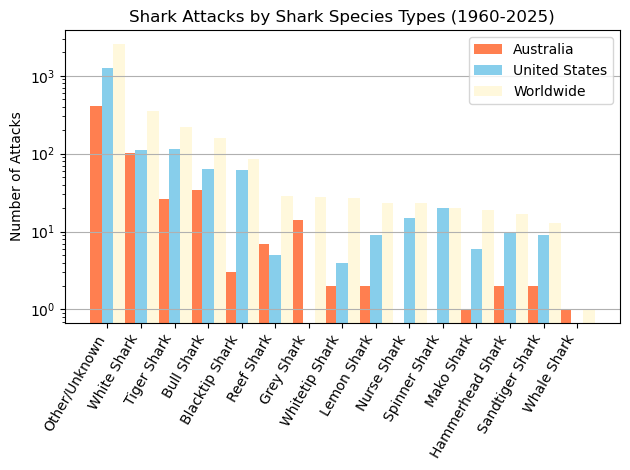

In [1245]:
# Ensure correct species names
df["Species_Types"] = df["Species_Types"].str.strip()  #To remove extra spaces

# Define shark species
sharkname = ["Other/Unknown", "White Shark", "Tiger Shark", "Bull Shark", "Blacktip Shark",
             "Reef Shark", "Grey Shark", "Whitetip Shark", "Lemon Shark", "Nurse Shark",
             "Spinner Shark", "Mako Shark", "Hammerhead Shark", "Sandtiger Shark", "Whale Shark"]

width = 0.35  # Width of bars
xval = np.arange(len(sharkname))  #xval matches sharkname length

# Filter by region
usa_df = df[df["Country"] == "United States"]
aus_df = df[df["Country"] == "Australia"]

# Function to count shark species for a given DataFrame
def count_shark_species(df):
    return [
        df["Species_Types"].str.contains("Other/Unknown", case=False, na=False).sum(),
        df["Species_Types"].str.contains("White shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Tiger shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Bull shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Blacktip shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Reef shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Grey shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Whitetip shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Lemon shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Nurse shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Spinner shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Mako shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Hammerhead shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Sandtiger shark", case=False, na=False).sum(),
        df["Species_Types"].str.contains("Whale shark", case=False, na=False).sum()
    ]

# Get counts for each region
world_all_counts = count_shark_species(df)       # Worldwide
usa_all_counts = count_shark_species(usa_df)     # USA
aus_all_counts = count_shark_species(aus_df)     # Australia

# Print counts before plotting
print("Worldwide counts:", world_all_counts)
print("USA counts:", usa_all_counts)
print("Australia counts:", aus_all_counts)

# Plot bars
plt.bar(xval - width, aus_all_counts, label="Australia", width=width, color="coral")
plt.bar(xval, usa_all_counts, label="United States", width=width, color="skyblue")
plt.bar(xval + width, world_all_counts, label="Worldwide", width=width, color="cornsilk")

# Format x-axis
plt.xticks(ticks=xval, labels=sharkname, rotation=60, ha="right")
plt.title("Shark Attacks by Shark Species Types (1960-2025)")
plt.ylabel("Number of Attacks")
plt.legend()
plt.grid(axis="y")

#log scale
plt.yscale("log")

plt.tight_layout()
plt.savefig("AttacksBySpecies.png")
plt.show()
